# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 11 Task 1 - Clustering - PCA
### Assignment by: Kat Weissman

#### General objective:

- Become familiar with clustering algorithms.

#### Python Learning Objectives:
- K Means
- Hierarchical clustering

*Recommended learning resources:*
- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- https://realpython.com/k-means-clustering-python/
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
- https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/


In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### Principal Component Analysis

In [3]:
pd.set_option('display.max_columns', None)  #set display to show all columns

I will load the data which I pre-processed and scaled using RobustScaler in a different notebook.

- https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/Sprint11-Clustering-Sample-PreProcessing%20.ipynb

In [4]:
# load data
data_link = 'https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/flights-sampled-robustscale.csv?raw=true'
df = pd.read_csv(data_link)

#### Data Exploration

In [5]:
# Show number of rows and columns in dataframe
df.shape

(96419, 7)

In [6]:
# Show column names and dtypes
df.dtypes

CRSElapsedTime    float64
AirTime           float64
ArrDelay          float64
DepDelay          float64
Distance          float64
TaxiIn            float64
TaxiOut           float64
dtype: object

In [7]:
# Display first 5 rows of dataframe
df.head(5)

,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,1.892857,2.050633,-0.510638,-0.439024,2.048485,-0.25,-0.181818
1,-0.333333,-0.265823,-0.191489,-0.439024,-0.359091,0.75,0.454545
2,-0.666667,-0.620253,-0.276596,-0.317073,-0.621212,-0.75,0.181818
3,0.107143,0.392405,-0.021277,-0.195122,0.121212,-0.75,-0.545455
4,-0.011905,-0.050633,-0.212766,0.121951,-0.025758,0.00,-0.545455


In [8]:
# Check for duplicates
sum(df.duplicated())

22

In [9]:
# Check for NA values
df.isna().sum()

CRSElapsedTime    0
AirTime           0
ArrDelay          0
DepDelay          0
Distance          0
TaxiIn            0
TaxiOut           0
dtype: int64

In [10]:
df.describe()

,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,96419.000000,96419.000000,96419.000000,96419.000000,96419.000000,96419.000000,96419.000000
mean,0.215144,0.229707,0.385457,0.464967,0.237805,0.206622,0.377418
std,0.845323,0.866049,1.194652,1.282684,0.866427,1.298131,1.295855
min,-1.202381,-1.139241,-1.914894,-0.439024,-0.872727,-1.500000,-1.272727
25%,-0.416667,-0.405063,-0.319149,-0.292683,-0.407576,-0.500000,-0.363636
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.583333,0.594937,0.680851,0.707317,0.592424,0.500000,0.636364
max,6.476190,6.797468,26.148936,29.609756,6.598485,35.000000,28.454545


I will apply PCA before clustering so that I can plot the results in two dimensions.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [11]:
pca = PCA(n_components=4)

In [12]:
pca.fit(df)

PCA(n_components=4)

In [13]:
pca.explained_variance_ratio_

array([0.36601569, 0.26321712, 0.18451825, 0.17961734])

99% of the variance of the chosen scaled features are explained with 4 principal components.

In [14]:
pca.explained_variance_ratio_.sum()

0.9933684044413315

In [15]:
pca.singular_values_

array([552.57503787, 468.59588956, 392.33863317, 387.09319983])

Principal Component 1 represents Departure Delay and Arrival Delay the most, followed by TaxiOut and TaxiIn

In [16]:
pca.components_[0]

array([0.04257732, 0.04068829, 0.65816987, 0.67056301, 0.02985342,
       0.19094148, 0.27629589])

Principal Component 2 represents AirTime, Distance, and CRSElapasedTime the most, followed by TaxiIn and TaxiOut 

In [17]:
pca.components_[1]

array([ 0.5334772 ,  0.54065787, -0.10171317, -0.14690673,  0.53861977,
        0.22880006,  0.22068814])

Principal Component 3 represents TaxiIn the most

In [18]:
pca.components_[2]

array([-0.12842481, -0.13989397, -0.06888791, -0.13716551, -0.14436358,
        0.95308464, -0.10566769])

Principal Component 4 represents TaxiOut the most

In [19]:
pca.components_[3]

array([-0.1343035 , -0.15878324, -0.06339331, -0.28693705, -0.16899231,
       -0.01116066,  0.91745076])

In [21]:
X = pca.transform(df)

Values of first 4 PC's for first 5 observations:

In [22]:
df_X = pd.DataFrame(X)
df_X.head()

,0,1,2,3
0,-1.238091,2.850842,-0.921972,-1.012227
1,-0.922183,-0.549181,0.899407,0.613874
2,-1.294626,-1.472463,-0.382035,0.496146
3,-1.149435,-0.316652,-0.687722,-0.612451
4,-0.947126,-0.554357,0.095276,-0.588490


In [32]:
df_X.rename(columns={0:'PC_1', 1:'PC_2', 2:'PC_3', 3:'PC_4'}, inplace=True)

In [33]:
df_X.columns

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4'], dtype='object')

In [34]:
df_X.to_csv('flights-sampled-robustscale-PCA4.csv', index=False)

Summary statistics of 4 principal components:

All of the components are skewed to the positive side.

In [35]:
round(df_X.describe(),3)

,PC_1,PC_2,PC_3,PC_4
count,96419.000,96419.000,96419.000,96419.000
mean,-0.000,0.000,0.000,-0.000
std,1.780,1.509,1.264,1.247
min,-2.247,-6.683,-5.814,-9.916
25%,-1.087,-1.092,-0.636,-0.604
50%,-0.551,-0.331,-0.222,-0.189
75%,0.455,0.686,0.332,0.345
max,36.572,10.881,32.529,25.246


In [36]:
def plotComponents(df, x, y):
    plt.scatter(df[x], df[y], alpha=.1, color='black')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

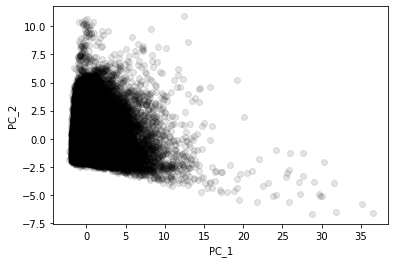

In [37]:
plotComponents(df_X, 'PC_1','PC_2')

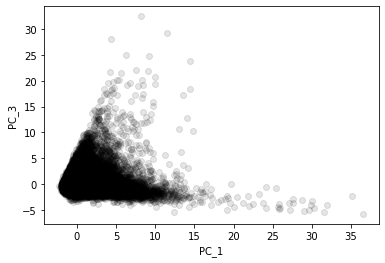

In [38]:
plotComponents(df_X, 'PC_1','PC_3')

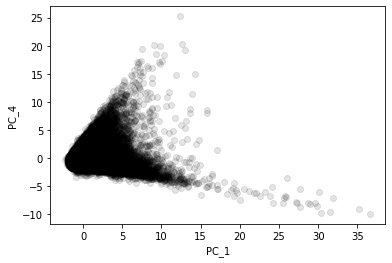

In [39]:
plotComponents(df_X, 'PC_1','PC_4')

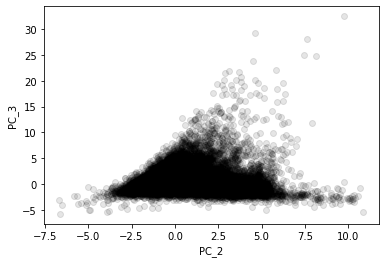

In [40]:
plotComponents(df_X, 'PC_2','PC_3')

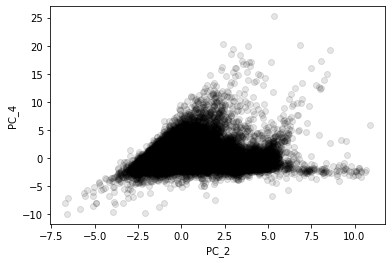

In [41]:
plotComponents(df_X, 'PC_2','PC_4')

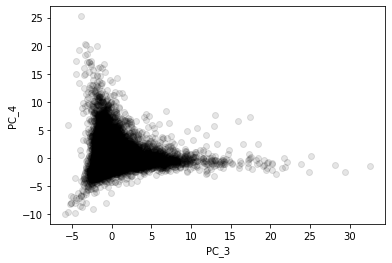

In [42]:
plotComponents(df_X, 'PC_3','PC_4')